<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-зарплат" data-toc-modified-id="Анализ-зарплат-1">Анализ зарплат</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-чтение-датасета" data-toc-modified-id="Импорт-библиотек-и-чтение-датасета-1.1">Импорт библиотек и чтение датасета</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2">Загрузка данных</a></span></li></ul></li><li><span><a href="#Задание" data-toc-modified-id="Задание-2">Задание</a></span><ul class="toc-item"><li><span><a href="#Распределение-зарплат" data-toc-modified-id="Распределение-зарплат-2.1">Распределение зарплат</a></span></li><li><span><a href="#Анализ-факторов" data-toc-modified-id="Анализ-факторов-2.2">Анализ факторов</a></span><ul class="toc-item"><li><span><a href="#пол-/-sex" data-toc-modified-id="пол-/-sex-2.2.1">пол / sex</a></span></li><li><span><a href="#тип-населенного-пункта-/-town_type" data-toc-modified-id="тип-населенного-пункта-/-town_type-2.2.2">тип населенного пункта / town_type</a></span></li><li><span><a href="#семейное-положение-/-marital_status" data-toc-modified-id="семейное-положение-/-marital_status-2.2.3">семейное положение / marital_status</a></span></li><li><span><a href="#проффессиональная-группа-/-professional_group" data-toc-modified-id="проффессиональная-группа-/-professional_group-2.2.4">проффессиональная группа / professional_group</a></span></li><li><span><a href="#образование-/-finished_education" data-toc-modified-id="образование-/-finished_education-2.2.5">образование / finished_education</a></span></li><li><span><a href="#индустрия-/-industry" data-toc-modified-id="индустрия-/-industry-2.2.6">индустрия / industry</a></span></li></ul></li><li><span><a href="#Кодировка-категориальных-признаков" data-toc-modified-id="Кодировка-категориальных-признаков-2.3">Кодировка категориальных признаков</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.4">Линейная регрессия</a></span></li><li><span><a href="#Корректность-линейной-регрессии" data-toc-modified-id="Корректность-линейной-регрессии-2.5">Корректность линейной регрессии</a></span></li></ul></li></ul></div>

# Анализ зарплат

Эта домашняя работа будет основана на основе данных РМЭЗ НИУ ВШЭ
- [об исследовании подробнее](https://www.hse.ru/rlms/)
- [данные за разные года](https://www.hse.ru/rlms/spss)
- [опросник для 25-ой волны](https://www.hse.ru/data/2018/11/15/1169536982/r25a_user_1216.pdf)
    - [за остальные волны](https://www.hse.ru/rlms/question)
- [кодировка переменных 25-ой волны](https://www.hse.ru/data/2019/09/09/1170599989/R25_ind_codebook_09.2019.pdf)
    - [за остальные волны](https://www.hse.ru/rlms/code)

## Импорт библиотек и чтение датасета

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels as sm

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

## Загрузка данных

Далее идет небольшая предобработка датасета, этот код можно просто запустить

In [3]:
# тип данных в колонках
cols = {
    'status':'category',
    'popul':'category',
    'u_age':float,
    'uh5':'category',
    'u_marst':'category',
    'u_diplom':'category',
    'u_educ':'category',
    'u_occup08':'category',
    'uj1':'category',
    'uj4.1':'category',
    'uj13.2':float
}


In [4]:
# как они будут переименованы
rename_cols={
    'status':'town_type',
    'popul':'population',
    'u_age':'age',
    'uh5':'sex',
    'u_marst':'marital_status',
    'u_diplom':'finished_education',
    'u_educ':'education',
    'u_occup08':'professional_group',
    'uj1':'employed',
    'uj4.1':'industry',
    'uj13.2':'wage'}


In [5]:
df = pd.read_csv('r25iall26с.csv', usecols=cols.keys(), dtype=cols, 
                 na_values=['#NULL!','NA','99999999','99999998','99999997'], 
                 low_memory=False)
df = df.rename(columns = rename_cols)
df.head()

,town_type,population,age,professional_group,education,finished_education,marital_status,sex,employed,industry,wage
0,3,12187,43.0,2,21,6,4,2,1,10,40000.0
1,3,12187,61.0,5,16,4,5,2,1,12,28000.0
2,3,12187,32.0,5,10,3,4,2,1,14,NaN
3,3,12187,30.0,NaN,9,3,2,1,5,NaN,NaN
4,3,12187,72.0,NaN,7,2,1,2,5,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18756 entries, 0 to 18755
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   town_type           18756 non-null  category
 1   population          18756 non-null  category
 2   age                 18755 non-null  float64 
 3   professional_group  8292 non-null   category
 4   education           15280 non-null  category
 5   finished_education  15280 non-null  category
 6   marital_status      15289 non-null  category
 7   sex                 18756 non-null  category
 8   employed            15302 non-null  category
 9   industry            8286 non-null   category
 10  wage                7025 non-null   float64 
dtypes: category(9), float64(2)
memory usage: 485.0 KB


In [7]:
df.describe()

,age,wage
count,18755.000000,7025.000000
mean,38.184537,24324.848114
std,22.702215,18163.937524
min,0.000000,0.000000
25%,20.000000,14000.000000
50%,37.000000,20000.000000
75%,56.000000,30000.000000
max,102.000000,400000.000000


In [8]:
# for j in df.dtypes[df.dtypes=='category'].index:
#     print('\n',j,list(df[j].unique()))

In [9]:
# как будут переименованы категории

town_type={1:'Областной центр',
2:'Город',
3:'Посёлок городского типа' ,
4:'Село',
}

marital_status={
1: 'Никогда в браке не состояли',
2: 'Состоите в зарегистрированном браке',
3: 'Живете вместе, но не зарегистрированы',
4: 'Разведены и в браке не состоите',
5: 'Bдовец (вдова)',
6: 'Официально зарегистрированы, но вместе не проживают',
}

sex={
1: 'М',
2: 'Ж',
}


professional_group=[
'Военнослужащие',
'Законодатели; крупные чиновники; руководители высш. и сред. звена',
'Специалисты высшего уровня квалификации',
'Специалисты среднего уровня квалификации; чиновники',
'Служащие офисные и по обслуживанию клиентов',
'Работники сферы торговли и услуг',
'Квалифицированные работники сельского, лесного хоз-ва и рыбоводства',
'Квалифицированные рабочие, занятые ручным трудом',
'Квалифицированные рабочие, исп. машины и механизмы',
'Неквалифицированные рабочие всех отраслей',
]
professional_group = {x:professional_group[x] for x in range(len(professional_group))}


finished_education = ['окончил 0 - 6 классов',
 'незаконченное среднее образование (7 - 8 кл)',
 'незаконченное среднее образование (7 - 8 кл) + что-то еще',
 'законченное среднее образование',
 'законченное среднее специальное образование',
 'законченное высшее образование и выше']
finished_education = {x:finished_education[x-1] for x in range(1,len(finished_education)+1)}


education = ['0 классов школы',
'1 класс школы',
'2 класса школы',
'3 класса школы',
'4 класса школы',
'5 классов школы',
'6 классов школы',
'7 классов школы',
'8 классов школы',
'9 классов школы',
'7-9 классов школы (незак. средн) +     без диплома',
'7-9 классов школы (незак. средн) +     с дипломом',
'10 и более классов школы без аттестата о среднем образовании',
'7-9 классов школы (незак. среднее) и менее 2 лет в техникуме',
'среднее образование - есть аттестат о ср. образовании',
'10 и более классов школы и какое-либо професс. обр. без диплома',
'10 и более классов школы и какое-либо професс. обр. с дипломом',
'10 и более классов школы и техникум без диплома',
'техникум с дипломом',
'1-2 года в высшем учебном заведении',
'3 и более лет в высшем учебном заведении',
'есть диплом о высшем образовании',
'аспирантура и т.п. без диплома',
'аспирантура и т.п. с дипломом',]
education = {x:education[x] for x in range(len(education))}

industry = ['ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ',
'ГРАЖДАНСКОЕ МАШИНОСТРОЕНИЕ',
'ВОЕННО-ПРОМЫШЛЕННЫЙ КОМПЛЕКС',
'НЕФТЕГАЗОВАЯ ПРОМЫШЛЕННОСТЬ',
'ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ',
'СТРОИТЕЛЬСТВО',
'ТРАНСПОРТ, СВЯЗЬ',
'СЕЛЬСКОЕ ХОЗЯЙСТВО',
'ОРГАНЫ УПРАВЛЕНИЯ',
'ОБРАЗОВАНИЕ',
'НАУКА, КУЛЬТУРА',
'ЗДРАВООХРАНЕНИЕ',
'АРМИЯ, МВД, ОРГАНЫ БЕЗОПАСНОСТИ',
'ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ',
'ФИНАНСЫ И СТРАХОВАНИЕ',
'ЭНЕРГЕТИЧЕСКАЯ ПРОМЫШЛЕННОСТЬ',
'ЖИЛИЩНО-КОММУНАЛЬНОЕ ХОЗЯЙСТВО',
'ОПЕРАЦИИ С НЕДВИЖИМОСТЬЮ',
'ДРУГОЕ',]
industry=[x.lower().capitalize() for x in industry]
industry = {x:industry[x-1] for x in range(1,1+len(industry))}

employed = ['Вы сейчас работаете',
'Вы находитесь в отпуске - декретном или по уходу за ребёнком до 3-х лет',
'Вы находитесь в любом другом оплачиваемом отпуске',
'Вы находитесь в неоплачиваемом отпуске',
'Или у Вас сейчас нет работы',]
employed = {x:employed[x-1] for x in range(1,1+len(employed))}


In [10]:
df['population'] = df['population'].astype(int)

In [11]:
df['industry'] = np.where(df['industry'].astype(float)>19,19,df['industry'])
df['industry'] = df['industry'].astype('category')
df['industry'].head()

0     10
1     12
2     14
3    NaN
4    NaN
Name: industry, dtype: category
Categories (19, object): [19, '1', '10', '11', ..., '6', '7', '8', '9']

In [12]:
cats = df.dtypes[df.dtypes=='category'].index
for col in cats:
    dict_j = globals()[col]
#     print('\n',col,dict_j,sep='\n')
#     df[col] = df[col].astype('category').cat.rename_categories(dict_j)
    df[col] = df[col].astype(float).replace(dict_j).astype('category')


In [13]:
df.head()

,town_type,population,age,professional_group,education,finished_education,marital_status,sex,employed,industry,wage
0,Посёлок городского типа,12187,43.0,Специалисты высшего уровня квалификации,есть диплом о высшем образовании,законченное высшее образование и выше,Разведены и в браке не состоите,Ж,Вы сейчас работаете,Образование,40000.0
1,Посёлок городского типа,12187,61.0,Работники сферы торговли и услуг,10 и более классов школы и какое-либо професс....,законченное среднее образование,Bдовец (вдова),Ж,Вы сейчас работаете,Здравоохранение,28000.0
2,Посёлок городского типа,12187,32.0,Работники сферы торговли и услуг,7-9 классов школы (незак. средн) + без дип...,незаконченное среднее образование (7 - 8 кл) +...,Разведены и в браке не состоите,Ж,Вы сейчас работаете,"Торговля, бытовое обслуживание",NaN
3,Посёлок городского типа,12187,30.0,NaN,9 классов школы,незаконченное среднее образование (7 - 8 кл) +...,Состоите в зарегистрированном браке,М,Или у Вас сейчас нет работы,NaN,NaN
4,Посёлок городского типа,12187,72.0,NaN,7 классов школы,незаконченное среднее образование (7 - 8 кл),Никогда в браке не состояли,Ж,Или у Вас сейчас нет работы,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18756 entries, 0 to 18755
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   town_type           18756 non-null  category
 1   population          18756 non-null  int32   
 2   age                 18755 non-null  float64 
 3   professional_group  8292 non-null   category
 4   education           15280 non-null  category
 5   finished_education  15280 non-null  category
 6   marital_status      15289 non-null  category
 7   sex                 18756 non-null  category
 8   employed            15302 non-null  category
 9   industry            8286 non-null   category
 10  wage                7025 non-null   float64 
dtypes: category(8), float64(2), int32(1)
memory usage: 515.7 KB


# Задание

| Задание                            | Баллы          |
|------------------------------------|----------------|
| Добавление новых переменных        |             5 |
| Распределение зарплат              |             15 |
| Анализ факторов                    |             30+50 |
| Кодировка категориальных признаков |             15 |
| Линейная регрессия                 |             5 |
| Корректность линейной регрессии    |             10 |
| Всего                              |            80
|

## Распределение зарплат

Изучите опросник или кодировку переменных в этом исследовании и добавьте 1-3 переменных, которые могли бы влиять на зарплату.


Исследуйте распределение зарплат в России. 

- Похоже ли распределение на нормальное? А после логарифмирования? Воспользуйтесь формальными критериями для выводов. Если бы выборка была меньше, изменились бы выводы?
- Постройте подходящие гистограммы. Проанализируйте qq-график для исходной переменной и логарифмированной. Можно ли предположить, что логарифм зарплат имеет нормальное распределение?


### Добавление переменных

In [15]:
# тип данных в колонках
cols = {
    'ui1':'category', # Вы родились в другом населенном пункте или в том, где живете сейчас?
    'uj6':'category', # У Вас есть подчиненные на этой работе? 
    'uj6.0':float, # Сколько у Вас подчиненных? Пожалуйста, посчитайте всех Ваших подчиненных, а не только
                   # тех, кто находится в Вашем непосредственном подчинении
    'uj21.3':'category', # Является ли производство, на котором Вы работаете, вредным или опасным, т.е. дающим Вам
                         # право на досрочное назначение трудовой пенсии, на дополнительные выплаты или льготы?
    'uj11': 'category', # На этой работе Вы работаете на предприятии, в организации?
    'uj23': 'category', # Является государство владельцем или совладельцем Вашего предприятия, организации?
    'uj24': 'category', # Являются владельцами или совладельцами Вашего предприятия, организации иностранные
                       # фирмы или иностранные частные лица?
    'uj26': 'category', # А Вы лично являетесь владельцем или совладельцем предприятия, на котором Вы работаете?
    'uj29': 'category' # Как Вы считаете, на этой работе Вы занимаетесь предпринимательской деятельностью? 
}

In [16]:
# как они будут переименованы
rename_cols={
    'ui1':'migrated',
    'uj6':'subordinates',
    'uj6.0':'number of subordinates',
    'uj21.3':'hazardous job',
    'uj11': 'organisation', 
    'uj23': 'government (co-)owner', 
    'uj24': 'foreign (co-)owner',              
    'uj26': 'respondent (co-)owner', 
    'uj29': 'interpreneur'}

In [17]:
df_addon = pd.read_csv('r25iall26с.csv', usecols=cols.keys(), dtype=cols, 
                 na_values=['#NULL!','NA','99999999','99999998','99999997'], 
                 low_memory=False)
df_addon = df_addon.rename(columns = rename_cols)
df_addon.head()

,migrated,subordinates,number of subordinates,organisation,hazardous job,government (co-)owner,foreign (co-)owner,respondent (co-)owner,interpreneur
0,1,2,NaN,1,1,1,2,2,2
1,1,2,NaN,1,2,1,2,2,2
2,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN
3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_addon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18756 entries, 0 to 18755
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   migrated                18751 non-null  category
 1   subordinates            8315 non-null   category
 2   number of subordinates  1538 non-null   float64 
 3   organisation            8313 non-null   category
 4   hazardous job           7464 non-null   category
 5   government (co-)owner   7271 non-null   category
 6   foreign (co-)owner      7236 non-null   category
 7   respondent (co-)owner   7513 non-null   category
 8   interpreneur            7447 non-null   category
dtypes: category(8), float64(1)
memory usage: 293.7 KB


In [19]:
df_addon.describe(include='category')

,migrated,subordinates,organisation,hazardous job,government (co-)owner,foreign (co-)owner,respondent (co-)owner,interpreneur
count,18751,8315,8313,7464,7271,7236,7513,7447
unique,2,2,2,2,2,2,2,2
top,2,2,1,2,2,2,2,2
freq,10985,6739,7528,6461,3934,6997,7313,7108


In [20]:
df_addon = df_addon[['migrated', 'subordinates', 'government (co-)owner']]

In [21]:
df_addon.replace({'1': 'Да', '2': 'Нет'}, inplace=True)

In [22]:
df = pd.merge(df, df_addon, left_index=True, right_index=True)
df.head()

,town_type,population,age,professional_group,education,finished_education,marital_status,sex,employed,industry,wage,migrated,subordinates,government (co-)owner
0,Посёлок городского типа,12187,43.0,Специалисты высшего уровня квалификации,есть диплом о высшем образовании,законченное высшее образование и выше,Разведены и в браке не состоите,Ж,Вы сейчас работаете,Образование,40000.0,Да,Нет,Да
1,Посёлок городского типа,12187,61.0,Работники сферы торговли и услуг,10 и более классов школы и какое-либо професс....,законченное среднее образование,Bдовец (вдова),Ж,Вы сейчас работаете,Здравоохранение,28000.0,Да,Нет,Да
2,Посёлок городского типа,12187,32.0,Работники сферы торговли и услуг,7-9 классов школы (незак. средн) + без дип...,незаконченное среднее образование (7 - 8 кл) +...,Разведены и в браке не состоите,Ж,Вы сейчас работаете,"Торговля, бытовое обслуживание",NaN,Нет,Нет,NaN
3,Посёлок городского типа,12187,30.0,NaN,9 классов школы,незаконченное среднее образование (7 - 8 кл) +...,Состоите в зарегистрированном браке,М,Или у Вас сейчас нет работы,NaN,NaN,Нет,NaN,NaN
4,Посёлок городского типа,12187,72.0,NaN,7 классов школы,незаконченное среднее образование (7 - 8 кл),Никогда в браке не состояли,Ж,Или у Вас сейчас нет работы,NaN,NaN,Да,NaN,NaN


### Распределение зарплат

In [23]:
df = df[df.employed == 'Вы сейчас работаете']
df = df.drop('employed', axis=1)

In [24]:
df = df[df.wage.notna()]
df.reset_index(drop=True, inplace=True)

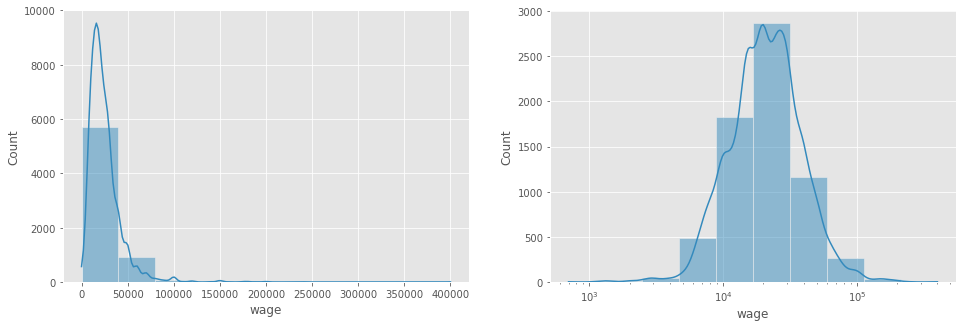

In [25]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(df['wage'], bins=10, kde=True)
plt.subplot(122)
sns.histplot(df[df.wage > 0]['wage'], bins=10, log_scale=True, kde=True);

Зарплаты и логарифм зарплат имеют очень тяжёлые хвосты. Поэтому их распределение точно не будет нормальным. Если бы выборка была меньше, ничего бы не изменилось.

In [26]:
df['ln_wage'] = df['wage'].apply(np.log1p)

In [27]:
from scipy import stats

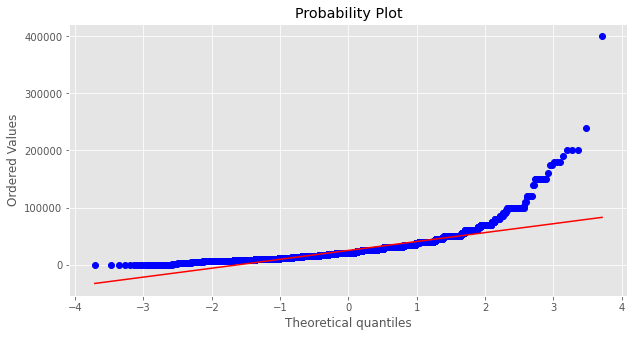

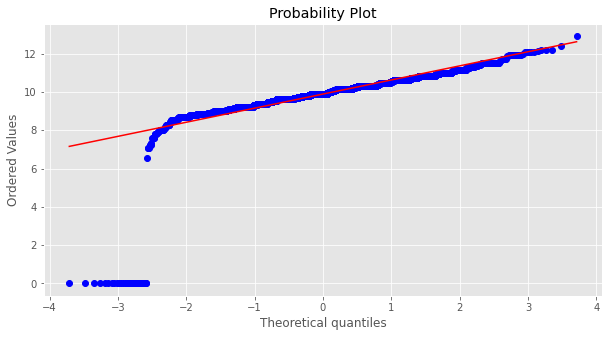

In [28]:
stats.probplot(df.wage, dist="norm", plot=plt);
plt.show()
stats.probplot(df.ln_wage, dist="norm", plot=plt);

### Критерий Колмогорова

$$
\begin{aligned}
H_0 : X \sim N(\mu, \sigma^2) \\
H_1 : X \nsim N(\mu, \sigma^2)
\end{aligned}
$$

In [29]:
wage = df.wage.dropna()
mean = wage.mean()
std = wage.std()
alpha = 0.05

P = stats.kstest(wage, 'norm', args=(mean, std))[1]

print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if P < alpha else 'не отвергается', alpha))

P-значение: 6e-173
Нулевая гипотеза отвергается на уровне значимости 0.05


In [30]:
wage = df.ln_wage.dropna()
mean = wage.mean()
std = wage.std()
alpha = 0.05

P = stats.kstest(wage, 'norm', args=(mean, std))[1]

print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if P < alpha else 'не отвергается', alpha))

P-значение: 2e-106
Нулевая гипотеза отвергается на уровне значимости 0.05


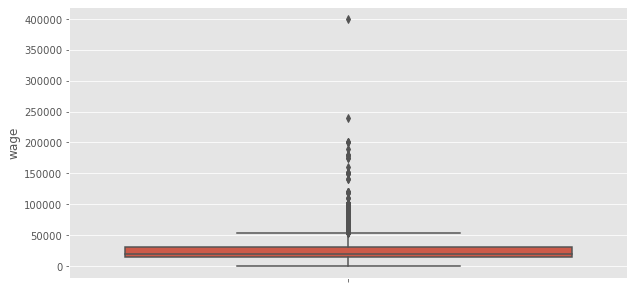

In [31]:
sns.boxplot(data=df, y='wage');

In [32]:
q1 = df.wage.quantile(0.25)
q3 = df.wage.quantile(0.75)
q1, q3

(14500.0, 30000.0)

In [33]:
iqr = q3 - q1
q3 + 1.5 * iqr

53250.0

In [34]:
df = df[df.wage <= q3 + 1.5 * iqr]
df.reset_index(drop=True, inplace=True)

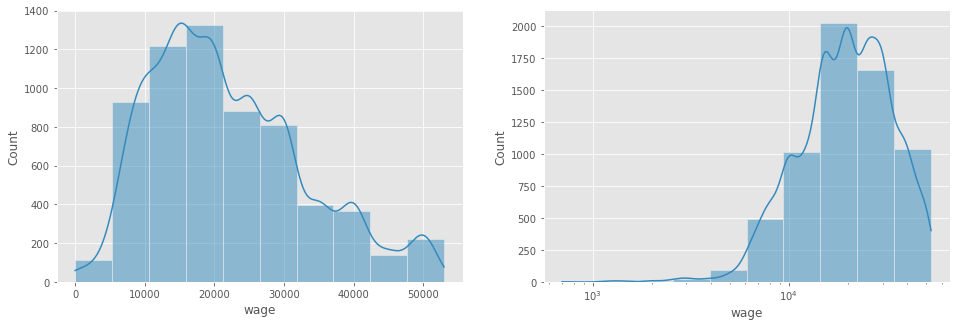

In [35]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(df['wage'], bins=10, kde=True)
plt.subplot(122)
sns.histplot(df[df.wage > 0]['wage'], bins=10, log_scale=True, kde=True);

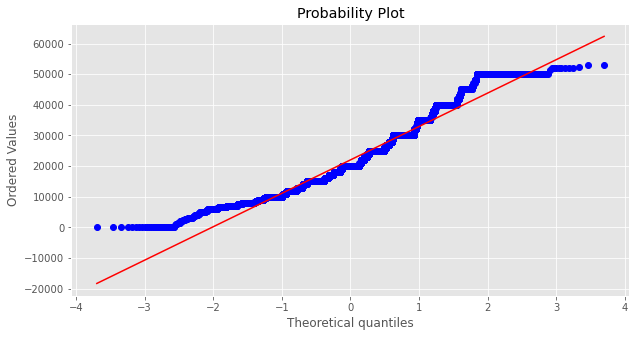

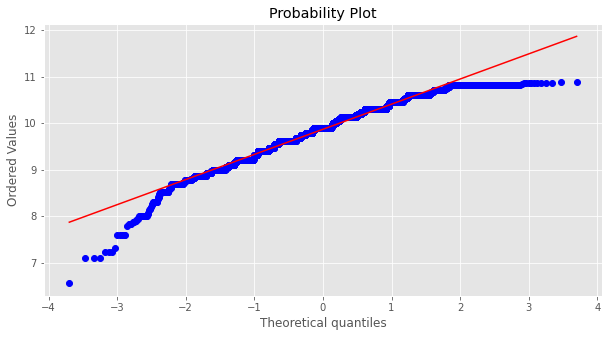

In [36]:
stats.probplot(df.wage, dist="norm", plot=plt);
plt.show()
stats.probplot(df[df.ln_wage > 0].ln_wage, dist="norm", plot=plt);

### Критерий Колмогорова

$$
\begin{aligned}
H_0 : X \sim N(\mu, \sigma^2) \\
H_1 : X \nsim N(\mu, \sigma^2)
\end{aligned}
$$

In [37]:
wage = df.wage
mean = wage.mean()
std = wage.std()
alpha = 0.05

P = stats.kstest(wage, 'norm', args=(mean, std))[1]

print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if P < alpha else 'не отвергается', alpha))

P-значение: 2.3e-85
Нулевая гипотеза отвергается на уровне значимости 0.05


In [38]:
wage = df[df.ln_wage > 0].ln_wage
mean = wage.mean()
std = wage.std()
alpha = 0.05

P = stats.kstest(wage, 'norm', args=(mean, std))[1]

print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if P < alpha else 'не отвергается', alpha))

P-значение: 3.8e-32
Нулевая гипотеза отвергается на уровне значимости 0.05


**Нормальность выборки зарплат и логарифма от этой выборки отвергается даже после очистки от выбросов**

## Анализ факторов

**Часть 1**
- Для начала оставьте в выборке только работающих (колонка - employed)
- Проанализируйте влияние каждого фактора на зарплату
    - пол / sex
    - тип населенного пункта / town_type
    - семейное положение / marital_status
    - проффессиональная группа / professional_group
    - образование / finished_education
    - индустрия / industry
- Для анализа взаимосвязи постройте подходящие графики 
    - например, боксплоты зарплаты в зависимости от категорий или распределение зарплаты в зависимости от бинарных переменных
    - вы можете рассмотреть, как логарифм зарплаты, так и ее оригинальное значение – в зависимости от того, что решили делать с целевой переменной и как лучше видна взаимосвязь или её отсутствие
- Напишите **краткие** выводы о наличии взаимосвязи (к более развернутым выводам стоит прийти после построения регрессии)


---

Следующее задание будет связано с подготовкой датасета к one-hot кодированию, поэтому уже на этом этапе имеет смысл подумать о том, как будут закодированы категориальные факторы

Особое внимание нужно обратить на категории, которых мало в выборке. Их стоит удалить или укрупнить до собирательной категории `Иное`. Например тех, кто закончил `0-6 классов`, почти нет в выборке, коэффицент для этой категории будет не значим, поэтому эту категорию можно заранее удалить (например, удалить эти наблюдения как выбросы).

Рекомендуется проанализировать подобную таблицу для каждого фактора или нанести значения из неё на график (пример графика ниже)

<a href="https://ibb.co/NFRYmxq"><img src="https://i.ibb.co/rQ9yckh/image.png" alt="image" border="0"></a>



In [39]:
df.corr()

,population,age,wage,ln_wage
population,1.000000,0.014247,0.275394,0.154424
age,0.014247,1.000000,-0.137673,-0.073925
wage,0.275394,-0.137673,1.000000,0.684661
ln_wage,0.154424,-0.073925,0.684661,1.000000


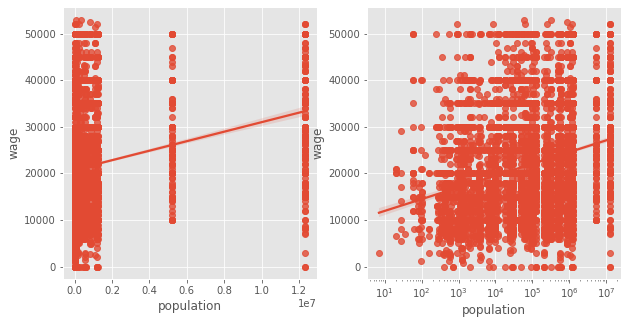

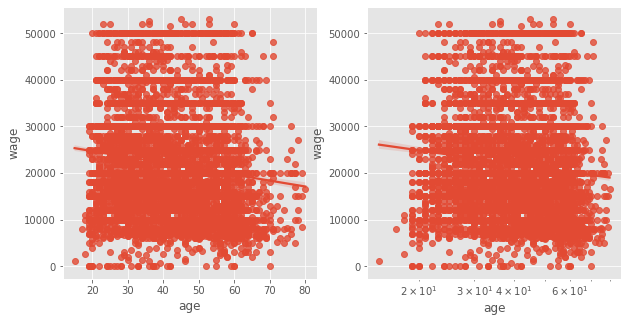

In [40]:
for x in ['population', 'age']:
    plt.subplot(121)
    sns.regplot(data=df, x=x, y='wage',  
    #                 logx=True
               )
    plt.subplot(122)
    sns.regplot(data=df, x=x, y='wage',  
                logx=True
               )
    plt.xscale('log')
    plt.show()

Возраст и численность населения не влияют на зарплату.

In [41]:
cols = set(df.columns)
num_cols = set(df._get_numeric_data().columns)
cat_cols = cols - num_cols

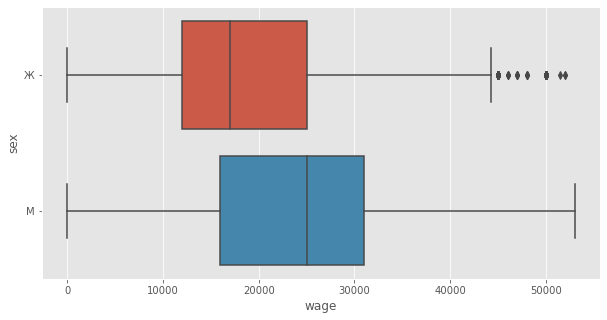

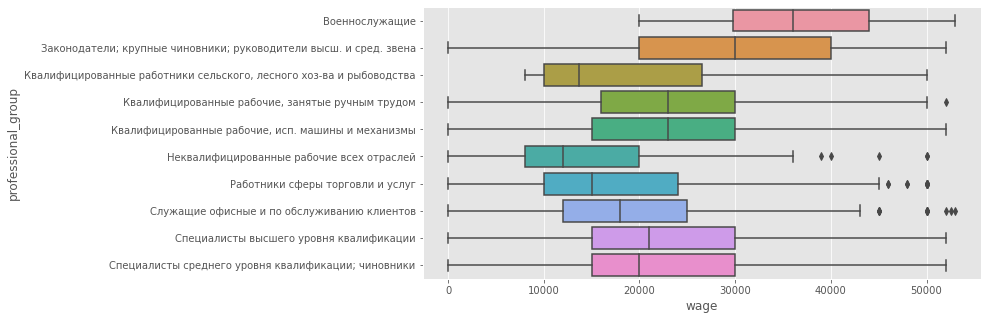

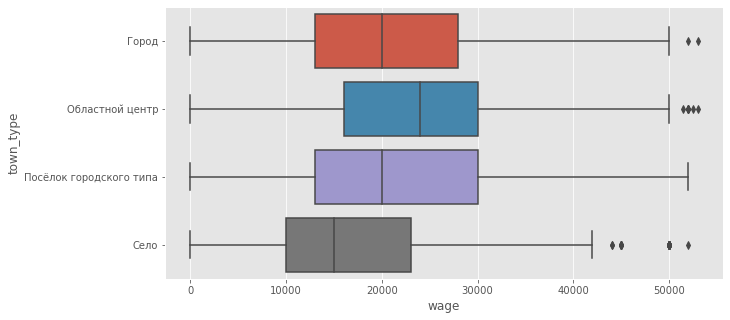

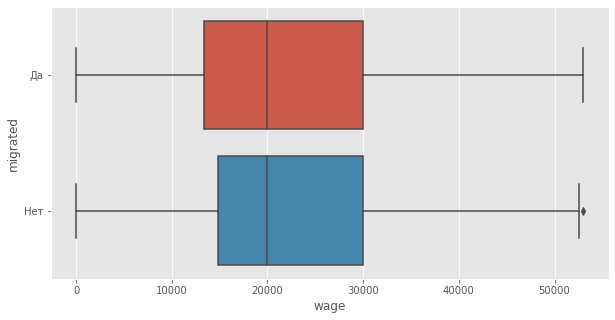

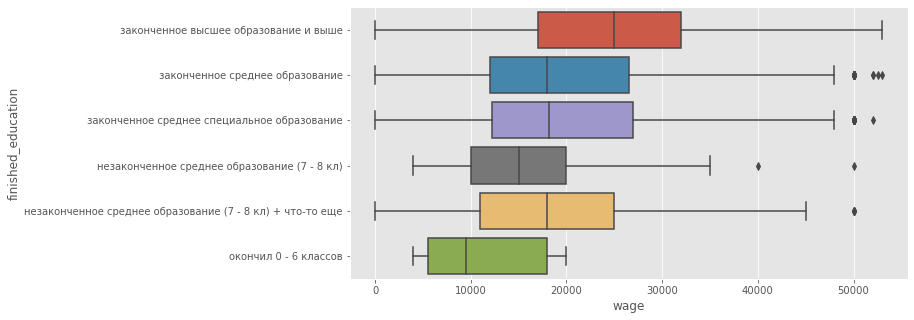

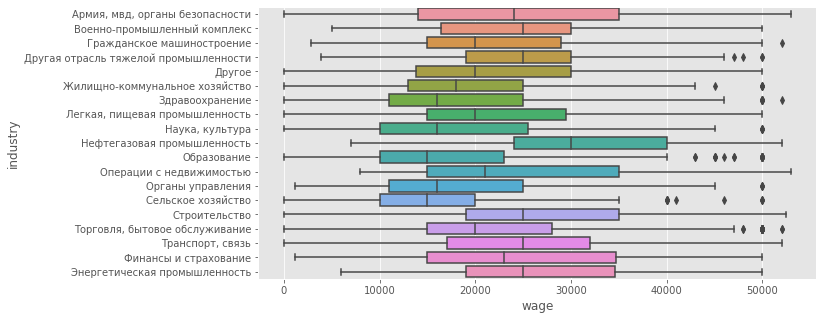

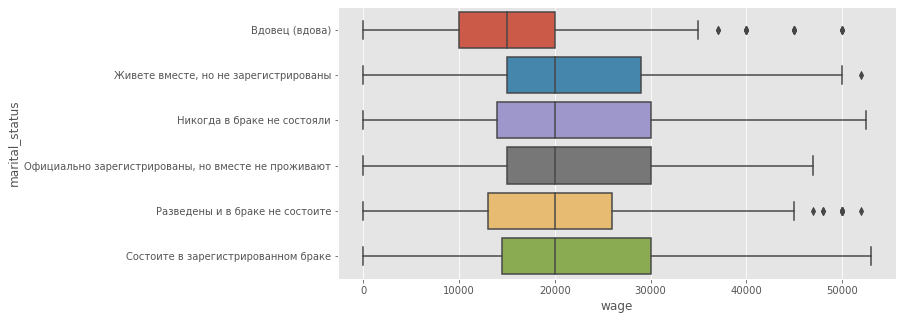

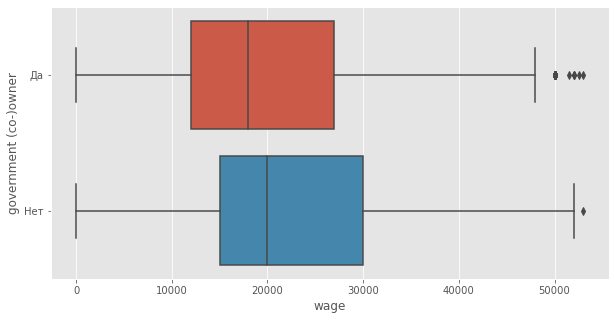

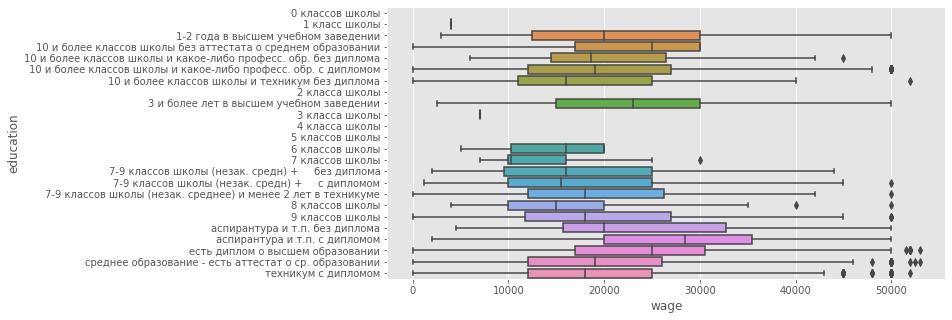

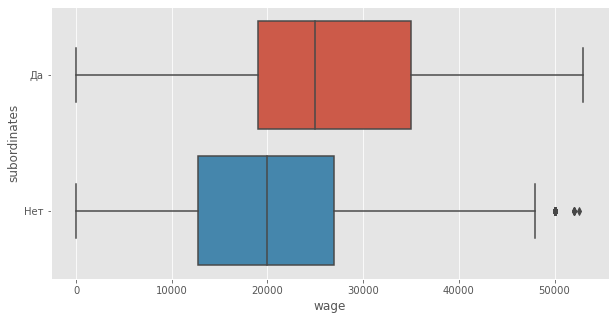

In [42]:
for y in list(cat_cols):
    sns.boxplot(data=df, x='wage', y=y, orient='h');
    plt.show()

**Краткие выводы**

Зарплата:
- выше, если есть подчинённые;
- ниже, если государство - (со)владелец предприятия;
- самая низкая у вдов(цов);
- не зависит от того, проживает ли человек там, где родился;
- зависит от (уровня) образования;
- выше у мужчин;
- ниже всего на селе;
- выше всего у военнослужащих, топ-менеджеров и крупных чиновников и ниже всего у неквалифицированных рабочих;
- зависит от отрасли.

In [43]:
df = df[df.finished_education != 'окончил 0 - 6 классов']
df = df[df.industry != 'Операции с недвижимостью']
df = df[df.professional_group != 'Квалифицированные работники сельского, лесного хоз-ва и рыбоводства']
df.reset_index(drop=True, inplace=True)

In [44]:
df.finished_education = df.finished_education.cat.remove_categories('окончил 0 - 6 классов')
df.education = df.education.cat.remove_categories(['0 классов школы', '1 класс школы', '5 классов школы', 
                                                 '4 класса школы', '3 класса школы', '2 класса школы', '6 классов школы'])
df.industry = df.industry.cat.remove_categories('Операции с недвижимостью')
df.professional_group = df.professional_group.cat.remove_categories(
                        'Квалифицированные работники сельского, лесного хоз-ва и рыбоводства')

**Часть 2 (бонусная, + 50 баллов)**

- При помощи инструментов для тестирования однородности выборок проверьте влияние всех на зарплату
- Для этого нужно попарно сравить однородность всех категорий друг с другом и воспользоваться корректировкой на множественное тестирование (например, методом Бенджамини-Хохберга)
- В качестве статистического теста воспользуйтесь критерием Манна-Уитни или t-тестом
- Решение лучше реализовать через фунции, циклы итд, чтобы его можно было легко применить на каждую исследуемую переменную и на любой стат. тест
    
В качестве решения, предлагается для каждого категориального признака составить свобдную таблицу, в которой будут сопоставлены все возможные пары категориальных признаков и выведен результат тестирования гипотезы об однородности с учетом корректировки. 

Например, в таблице ниже приведен результат тестирования гипотезы о равенстве средних з/п для всех возможных пар по переменной `тип населенного пункта / town_type`. На основе этой таблицы гипотеза о равенстве средней з/п в `городах` и `поселках городского типа` не отвергается, а в остальных случаях наоборот отвергается. 

<a href="https://ibb.co/HNnjyKS"><img src="https://i.ibb.co/SQRzg6j/image.png" alt="image" border="0" width=500></a>

Если проанализровать распределения з/п в зависимости от этой переменной, то в `городах` и `поселках городского типа` распределение и медианы оказываются достаточно близки, поэтому при кодировки этих двух категорий их можно объединить в одну общую `город и ПГТ`.

<a href="https://ibb.co/vQ8tLYd"><img src="https://i.ibb.co/5nV7sFj/image.png" alt="image" border="0"></a>


### Критерий Манна-Уитни c корректировкой методом Бенджамини-Хохберга

In [45]:
def test(df, x, hue):
    from statsmodels.sandbox.stats.multicomp import multipletests 
    
    df = df[df[hue].isna() == False]
    cat = dict()
    for i in df[hue].unique():
        cat[i] = df[df[hue] == i][x]
      
    pval = []
    p = 0
    for i in cat:
        for j in cat:
            _, p = stats.mannwhitneyu(cat[i], cat[j], alternative='two-sided')
            pval.append(p)
            
    pval = np.array(pval)
    _, p_corrected, _, _ = multipletests(pval, alpha = 0.05, method = 'fdr_bh') 
    t = list(p_corrected > 0.05)

    pivot = dict()
    z = 0
    n = 0
    for i in df[hue].unique():
        cat = dict()
        for j in df[hue].unique():
            if z / (df[hue].nunique() + 1) > n:
                cat[j] = t[z]
            else:
                cat[j] = np.nan
            z += 1
        pivot[i] = cat
        n += 1
        
    pivot = pd.DataFrame(pivot)
    pivot = pivot.dropna(axis=0, how='all')
    pivot = pivot.dropna(axis=1, how='all')
    pivot = pivot.style.applymap(lambda x: 'background-color: red' if x==True else
                                 ('background-color: green' if x == False else 'background-color: white'))
    return pivot         

Ниже идут подзаголовки для каждой переменной, которая может влиять на зарплату, просьба ими пользоваться

### пол / sex

In [46]:
y = 'sex'
test(df, 'wage', y)

,Ж
М,False


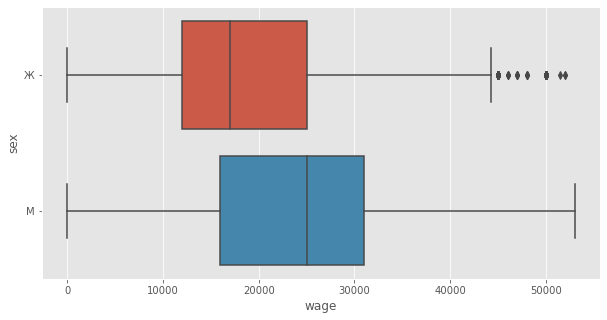

In [47]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

### тип населенного пункта / town_type


In [48]:
y = 'town_type'
test(df, 'wage', y)

,Посёлок городского типа,Село,Областной центр
Село,False,nan,nan
Областной центр,False,False,nan
Город,True,False,False


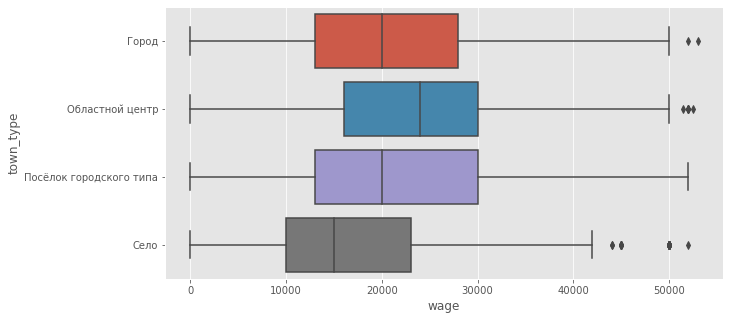

In [49]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

In [50]:
df = df.replace('Город', 'Город/ПГТ')
df = df.replace('Посёлок городского типа', 'Город/ПГТ')

In [51]:
y = 'town_type'
test(df, 'wage', y)

,Город/ПГТ,Село
Село,False,nan
Областной центр,False,False


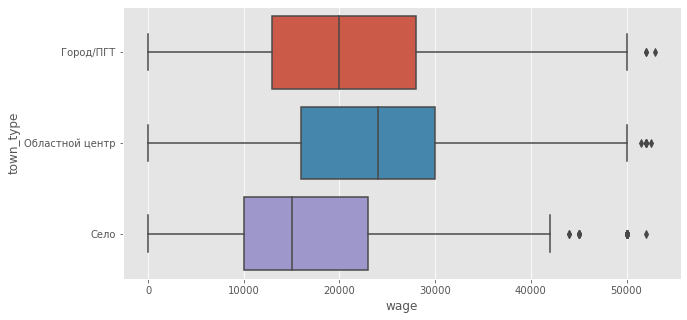

In [52]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

### семейное положение / marital_status

In [53]:
y = 'marital_status'
test(df, 'wage', y)

,Разведены и в браке не состоите,Bдовец (вдова),Никогда в браке не состояли,Состоите в зарегистрированном браке,"Живете вместе, но не зарегистрированы"
Bдовец (вдова),False,nan,nan,nan,nan
Никогда в браке не состояли,True,False,nan,nan,nan
Состоите в зарегистрированном браке,False,False,True,nan,nan
"Живете вместе, но не зарегистрированы",True,False,True,True,nan
"Официально зарегистрированы, но вместе не проживают",True,False,True,True,True


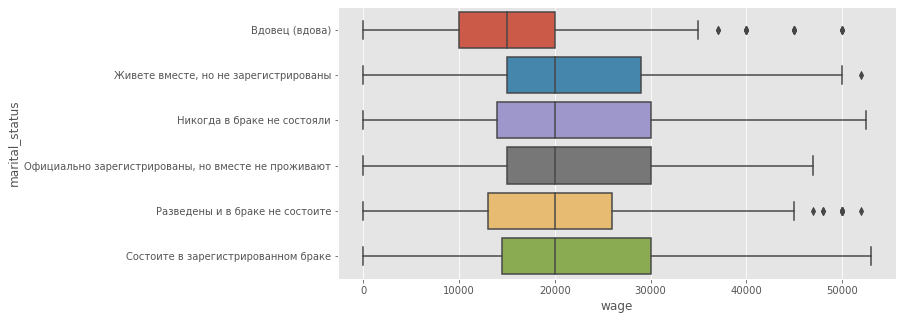

In [54]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

In [55]:
df = df.replace({'Официально зарегистрированы, но вместе не проживают': 'Состоите в (не)официальном или никогда не были в браке', 
                 'Никогда в браке не состояли': 'Состоите в (не)официальном или никогда не были в браке',
                 'Состоите в зарегистрированном браке': 'Состоите в (не)официальном или никогда не были в браке',
                 'Живете вместе, но не зарегистрированы': 'Состоите в (не)официальном или никогда не были в браке'})

In [56]:
y = 'marital_status'
test(df, 'wage', y)

,Разведены и в браке не состоите,Bдовец (вдова)
Bдовец (вдова),False,nan
Состоите в (не)официальном или никогда не были в браке,False,False


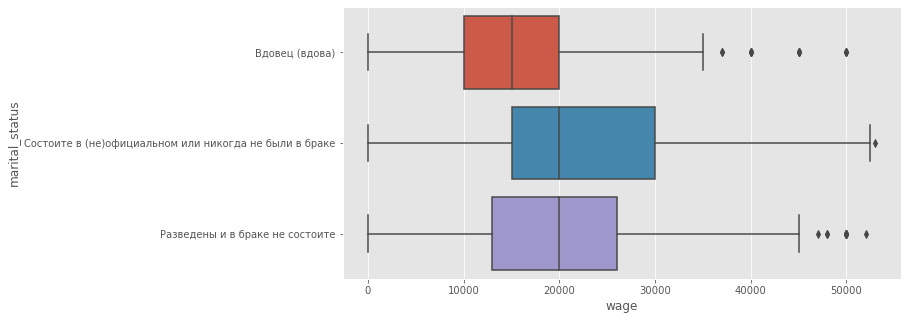

In [57]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

### проффессиональная группа / professional_group

In [58]:
y = 'professional_group'
test(df, 'wage', y)

,Специалисты высшего уровня квалификации,Работники сферы торговли и услуг,Неквалифицированные рабочие всех отраслей,Специалисты среднего уровня квалификации; чиновники,Законодатели; крупные чиновники; руководители высш. и сред. звена,"Квалифицированные рабочие, исп. машины и механизмы","Квалифицированные рабочие, занятые ручным трудом",Служащие офисные и по обслуживанию клиентов
Работники сферы торговли и услуг,False,nan,nan,nan,nan,nan,nan,nan
Неквалифицированные рабочие всех отраслей,False,False,nan,nan,nan,nan,nan,nan
Специалисты среднего уровня квалификации; чиновники,False,False,False,nan,nan,nan,nan,nan
Законодатели; крупные чиновники; руководители высш. и сред. звена,False,False,False,False,nan,nan,nan,nan
"Квалифицированные рабочие, исп. машины и механизмы",True,False,False,False,False,nan,nan,nan
"Квалифицированные рабочие, занятые ручным трудом",True,False,False,False,False,True,nan,nan
Служащие офисные и по обслуживанию клиентов,False,False,False,False,False,False,False,nan
Военнослужащие,False,False,False,False,False,False,False,False


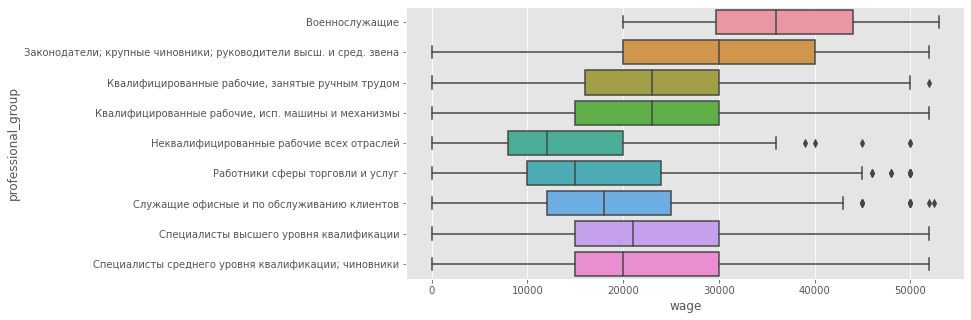

In [59]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

In [60]:
df = df.replace({'Специалисты высшего уровня квалификации': 'Квалифицированные рабочие и специалисты', 
                 'Квалифицированные рабочие, исп. машины и механизмы': 'Квалифицированные рабочие и специалисты',
                 'Квалифицированные рабочие, занятые ручным трудом': 'Квалифицированные рабочие и специалисты'})

In [61]:
y = 'professional_group'
test(df, 'wage', y)

,Квалифицированные рабочие и специалисты,Работники сферы торговли и услуг,Неквалифицированные рабочие всех отраслей,Специалисты среднего уровня квалификации; чиновники,Законодатели; крупные чиновники; руководители высш. и сред. звена,Служащие офисные и по обслуживанию клиентов
Работники сферы торговли и услуг,False,nan,nan,nan,nan,nan
Неквалифицированные рабочие всех отраслей,False,False,nan,nan,nan,nan
Специалисты среднего уровня квалификации; чиновники,False,False,False,nan,nan,nan
Законодатели; крупные чиновники; руководители высш. и сред. звена,False,False,False,False,nan,nan
Служащие офисные и по обслуживанию клиентов,False,False,False,False,False,nan
Военнослужащие,False,False,False,False,False,False


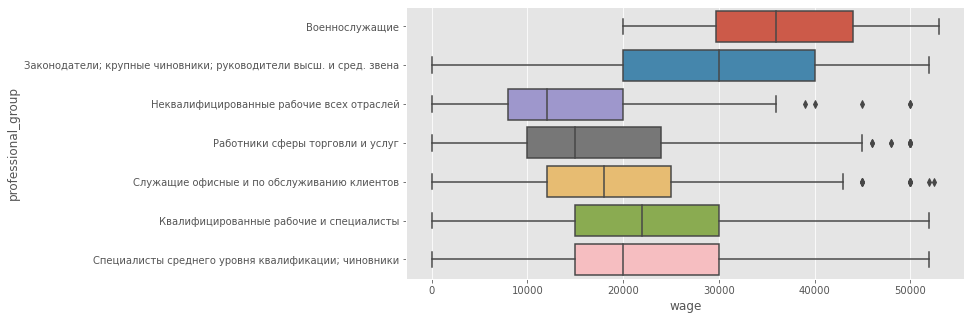

In [62]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

### образование / finished_education


In [63]:
y = 'finished_education'
test(df, 'wage', y)

,законченное высшее образование и выше,законченное среднее образование,незаконченное среднее образование (7 - 8 кл) + что-то еще,законченное среднее специальное образование
законченное среднее образование,False,nan,nan,nan
незаконченное среднее образование (7 - 8 кл) + что-то еще,False,True,nan,nan
законченное среднее специальное образование,False,True,False,nan
незаконченное среднее образование (7 - 8 кл),False,False,False,False


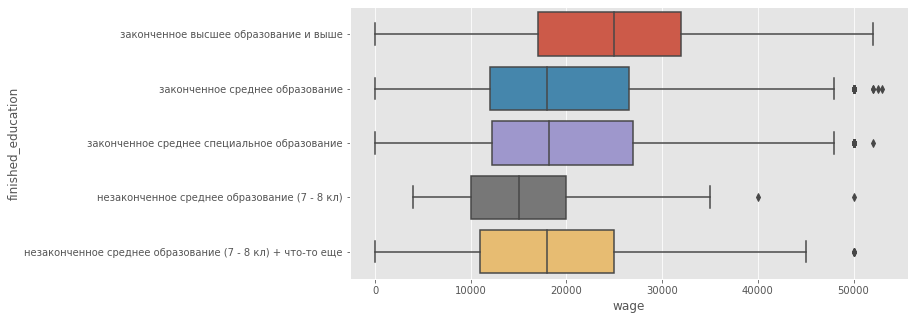

In [64]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

In [65]:
df = df.replace({'законченное среднее образование': 'Среднее и среднее специальное образование', 
                 'незаконченное среднее образование (7 - 8 кл) + что-то еще': 'Среднее и среднее специальное образование',
                 'законченное среднее специальное образование': 'Среднее и среднее специальное образование'})

In [66]:
y = 'finished_education'
test(df, 'wage', y)

,законченное высшее образование и выше,Среднее и среднее специальное образование
Среднее и среднее специальное образование,False,nan
незаконченное среднее образование (7 - 8 кл),False,False


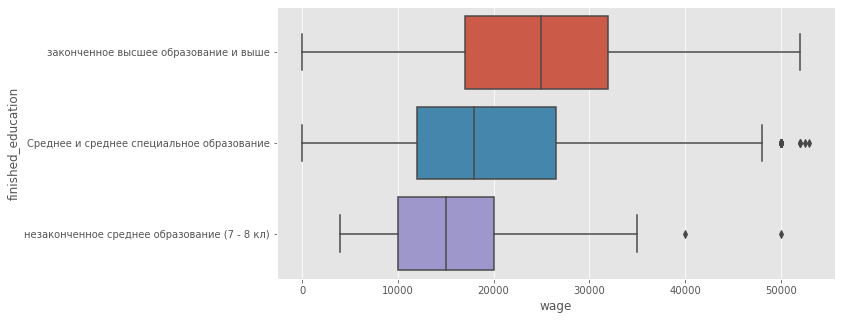

In [67]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

### индустрия / industry

In [68]:
y = 'industry'
test(df, 'wage', y)

,Образование,Здравоохранение,"Наука, культура",Другое,"Легкая, пищевая промышленность",Жилищно-коммунальное хозяйство,Сельское хозяйство,Нефтегазовая промышленность,"Транспорт, связь",Строительство,"Торговля, бытовое обслуживание",Органы управления,"Армия, мвд, органы безопасности",Другая отрасль тяжелой промышленности,Гражданское машиностроение,Военно-промышленный комплекс,Энергетическая промышленность
Здравоохранение,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"Наука, культура",True,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Другое,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"Легкая, пищевая промышленность",False,False,False,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Жилищно-коммунальное хозяйство,False,True,True,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Сельское хозяйство,True,False,True,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Нефтегазовая промышленность,False,False,False,False,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"Транспорт, связь",False,False,False,False,False,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan
Строительство,False,False,False,False,False,False,False,False,True,nan,nan,nan,nan,nan,nan,nan,nan
"Торговля, бытовое обслуживание",False,False,False,True,True,False,False,False,False,False,nan,nan,nan,nan,nan,nan,nan


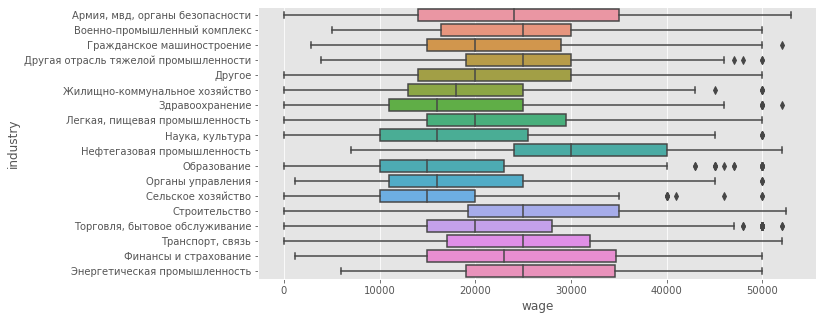

In [69]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

In [70]:
cats = ['Образование, здравоохранение, наука и культура',
        'Органы управления и ЖКХ',
        'Торговля, бытовое обслуживание, лёгкая и пищевая промышленность, гражданское машиностроение',
        'ВПК, транспорт и связь, строительство, энергетика, другая отрасль тяжёлой промышленности',
        'Армия, МВД, органы безопасности, финансы и страхование'
       ]
df.industry = df.industry.replace({'Образование': cats[0],
                                   'Здравоохранение': cats[0],
                                   'Наука, культура': cats[0],
                                   'Органы управления': cats[1],
                                   'Жилищно-коммунальное хозяйство': cats[1],
                                   'Легкая, пищевая промышленность': cats[2],
                                   'Торговля, бытовое обслуживание': cats[2],
                                   'Гражданское машиностроение': cats[2],
                                   'Военно-промышленный комплекс': cats[3],
                                   'Транспорт, связь': cats[3],
                                   'Строительство': cats[3],
                                   'Энергетическая промышленность': cats[3],
                                   'Другая отрасль тяжелой промышленности': cats[3],
                                   'Армия, мвд, органы безопасности': cats[4],
                                   'Финансы и страхование': cats[4]})

In [71]:
y = 'industry'
test(df, 'wage', y)

,"Образование, здравоохранение, наука и культура",Другое,"Торговля, бытовое обслуживание, лёгкая и пищевая промышленность, гражданское машиностроение",Органы управления и ЖКХ,Сельское хозяйство,Нефтегазовая промышленность,"ВПК, транспорт и связь, строительство, энергетика, другая отрасль тяжёлой промышленности"
Другое,False,nan,nan,nan,nan,nan,nan
"Торговля, бытовое обслуживание, лёгкая и пищевая промышленность, гражданское машиностроение",False,True,nan,nan,nan,nan,nan
Органы управления и ЖКХ,True,False,False,nan,nan,nan,nan
Сельское хозяйство,False,False,False,False,nan,nan,nan
Нефтегазовая промышленность,False,False,False,False,False,nan,nan
"ВПК, транспорт и связь, строительство, энергетика, другая отрасль тяжёлой промышленности",False,False,False,False,False,False,nan
"Армия, МВД, органы безопасности, финансы и страхование",False,False,False,False,False,False,False


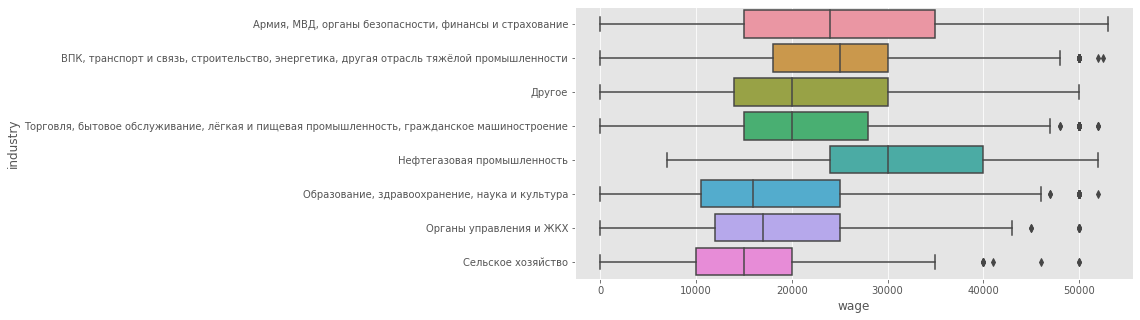

In [72]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

In [73]:
cats = ['Органы управления, ЖКХ, образование, здравоохранение, наука и культура',
        'Торговля, бытовое обслуживание, лёгкая и пищевая промышленность, гражданское машиностроение, другое'
       ]

df = df.replace({'Органы управления и ЖКХ': cats[0], 
                 'Образование, здравоохранение, наука и культура': cats[0],
                 'Торговля, бытовое обслуживание, лёгкая и пищевая промышленность, гражданское машиностроение': cats[1],
                 'Другое': cats[1]})

In [74]:
y = 'industry'
test(df, 'wage', y)

,"Органы управления, ЖКХ, образование, здравоохранение, наука и культура","Торговля, бытовое обслуживание, лёгкая и пищевая промышленность, гражданское машиностроение, другое",Сельское хозяйство,Нефтегазовая промышленность,"ВПК, транспорт и связь, строительство, энергетика, другая отрасль тяжёлой промышленности"
"Торговля, бытовое обслуживание, лёгкая и пищевая промышленность, гражданское машиностроение, другое",False,nan,nan,nan,nan
Сельское хозяйство,False,False,nan,nan,nan
Нефтегазовая промышленность,False,False,False,nan,nan
"ВПК, транспорт и связь, строительство, энергетика, другая отрасль тяжёлой промышленности",False,False,False,False,nan
"Армия, МВД, органы безопасности, финансы и страхование",False,False,False,False,False


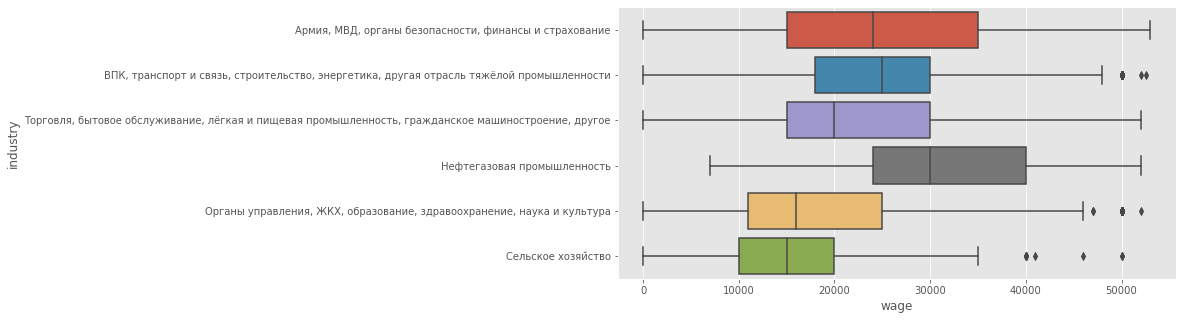

In [75]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

### переезд / migrated

In [76]:
y = 'migrated'
test(df, 'wage', y)

,Да
Нет,True


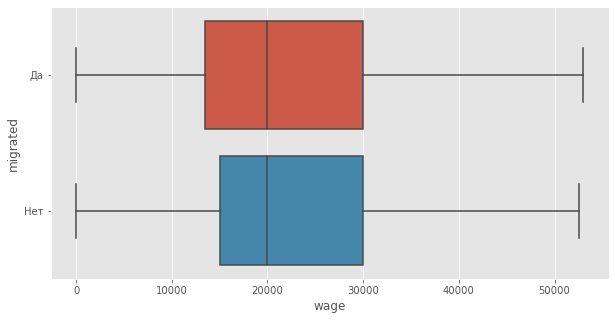

In [77]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

In [78]:
df = df.drop('migrated', axis=1)

### наличие подчинённых / subordinates

In [79]:
y = 'subordinates'
test(df, 'wage', y)

,Нет
Да,False


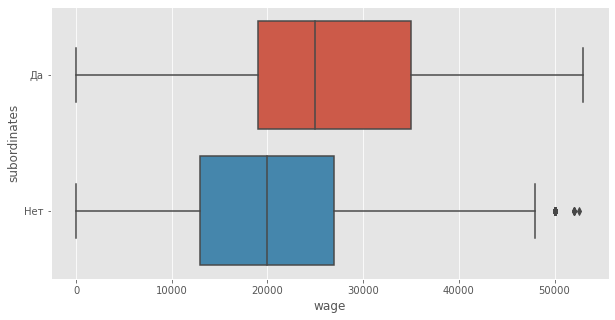

In [80]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

### государственная собственность / government (co-)owner

In [81]:
y = 'government (co-)owner'
test(df, 'wage', y)

,Да
Нет,False


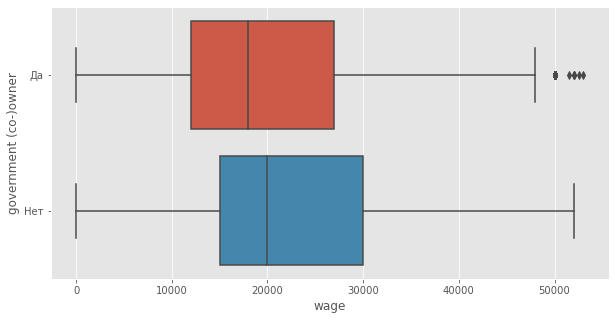

In [82]:
sns.boxplot(data=df, x='wage', y=y, orient='h');

## Кодировка категориальных признаков

Для построения линейной регрессии категориальные колонки предстоит закодировать с помощью one-hot-encoding. Для этого необходимо:
- для каждой категориальной колонки выбрать базовую категорию относительно которой будет анализироваться влияние; можно выбрать самую "плохую" или самую "хорошую" категорию или ту, относительно которой удобно вести интерпретацию, например, самую популярную
- удалить из анализа те категории, в которые попало слишком мало наблюдений (выбрать на ваше усмотрение такие категории), либо укрупнить их в собирательную категорию "иное"
- исходя из анализа в предыдущемм задании выбрать близкие по смыслу категории и крупнить (если гипотеза об их однородности не отвергается или если вы пришли к этому через визуальный анализ)
- те переменные, которые мало влияют на зарплату, можно не кодировать и не включать в итоговый датасет


In [83]:
df = df.drop('ln_wage', axis=1)
df = df.drop('education', axis=1)
df = df.dropna()

In [84]:
df.sex = df.sex.replace({'Ж': 0, 'М': 1})
df.subordinates = df.subordinates.replace({'Нет': 0, 'Да': 1})
df['government (co-)owner'] = df['government (co-)owner'].replace({'Нет': 1, 'Да': 0})

In [85]:
df.town_type = df.town_type.cat.reorder_categories(['Село', 'Город/ПГТ', 'Областной центр'], ordered=True)

df.professional_group = df.professional_group.cat.reorder_categories(['Неквалифицированные рабочие всех отраслей',
       'Военнослужащие',
       'Законодатели; крупные чиновники; руководители высш. и сред. звена',
       'Работники сферы торговли и услуг',
       'Служащие офисные и по обслуживанию клиентов',
       'Квалифицированные рабочие и специалисты',
       'Специалисты среднего уровня квалификации; чиновники'], ordered=True)

df.finished_education = df.finished_education.cat.reorder_categories(['незаконченное среднее образование (7 - 8 кл)',
       'законченное высшее образование и выше',
       'Среднее и среднее специальное образование'], ordered=True)

df.industry = df.industry.cat.reorder_categories(['Сельское хозяйство',
       'Армия, МВД, органы безопасности, финансы и страхование',
       'ВПК, транспорт и связь, строительство, энергетика, другая отрасль тяжёлой промышленности',
       'Торговля, бытовое обслуживание, лёгкая и пищевая промышленность, гражданское машиностроение, другое',
       'Нефтегазовая промышленность',
       'Органы управления, ЖКХ, образование, здравоохранение, наука и культура'], ordered=True)

df = pd.get_dummies(df, columns=['town_type', 'professional_group', 'finished_education',
                                 'marital_status', 'industry'], drop_first=True)

df.columns

Index(['population', 'age', 'sex', 'wage', 'subordinates',
       'government (co-)owner', 'town_type_Город/ПГТ',
       'town_type_Областной центр', 'professional_group_Военнослужащие',
       'professional_group_Законодатели; крупные чиновники; руководители высш. и сред. звена',
       'professional_group_Работники сферы торговли и услуг',
       'professional_group_Служащие офисные и по обслуживанию клиентов',
       'professional_group_Квалифицированные рабочие и специалисты',
       'professional_group_Специалисты среднего уровня квалификации; чиновники',
       'finished_education_законченное высшее образование и выше',
       'finished_education_Среднее и среднее специальное образование',
       'marital_status_Состоите в (не)официальном или никогда не были в браке',
       'marital_status_Разведены и в браке не состоите',
       'industry_Армия, МВД, органы безопасности, финансы и страхование',
       'industry_ВПК, транспорт и связь, строительство, энергетика, другая отрасль 

## Линейная регрессия

- Убедитесь, что все данные готовы и постройте линейную регрессию
- Проанализируйте результаты регрессии
- Соотносятся ли результаты регрессии с разведывательным анализом данных ранее?


In [86]:
df['const'] = np.ones_like(df['wage'])

X = df[['const', 'population', 'age', 'sex', 'subordinates',
       'government (co-)owner', 'town_type_Город/ПГТ',
       'town_type_Областной центр', 'professional_group_Военнослужащие',
       'professional_group_Законодатели; крупные чиновники; руководители высш. и сред. звена',
       'professional_group_Работники сферы торговли и услуг',
       'professional_group_Служащие офисные и по обслуживанию клиентов',
       'professional_group_Квалифицированные рабочие и специалисты',
       'professional_group_Специалисты среднего уровня квалификации; чиновники',
       'finished_education_законченное высшее образование и выше',
       'finished_education_Среднее и среднее специальное образование',
       'marital_status_Состоите в (не)официальном или никогда не были в браке',
       'marital_status_Разведены и в браке не состоите',
       'industry_Армия, МВД, органы безопасности, финансы и страхование',
       'industry_ВПК, транспорт и связь, строительство, энергетика, другая отрасль тяжёлой промышленности',
       'industry_Торговля, бытовое обслуживание, лёгкая и пищевая промышленность, гражданское машиностроение, другое',
       'industry_Нефтегазовая промышленность',
       'industry_Органы управления, ЖКХ, образование, здравоохранение, наука и культура']]

y = df['wage']

model = sm.regression.linear_model.OLS(endog=y, exog=X, hasconst=True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     145.9
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:57:02   Log-Likelihood:                -64437.
No. Observations:                6121   AIC:                         1.289e+05
Df Residuals:                    6098   BIC:                         1.291e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================================================
                                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                         7693.9286   1423.987      5.403      0.000    4902.411    1.05e+04
population                                                                                                       0.0009   4.28e-05     20.227      0.000       0.001       0.001
age                                                                                                            -71.7674     10.395     -6.904      0.000     -92.146     -51.389
sex                                                                                                           4136.3891    270.730     15.279      0.000    3605.663    4667.115
subordinates                                                                                                  4314.8894    347.806     12.406      0.000    3633.067    4996.712
government (co-)owner                                                                                         1443.2830    291.976      4.943      0.000     870.907    2015.659
town_type_Город/ПГТ                                                                                           1895.6059    327.693      5.785      0.000    1253.211    2538.000
town_type_Областной центр                                                                                    2646.8653    347.139      7.625      0.000    1966.350    3327.381
professional_group_Военнослужащие                                                                             1.337e+04   2047.076      6.532      0.000    9357.526    1.74e+04
professional_group_Законодатели; крупные чиновники; руководители высш. и сред. звена                          7969.6408    749.958     10.627      0.000    6499.459    9439.822
professional_group_Работники сферы торговли и услуг                                                           1929.3249    527.080      3.660      0.000     896.061    2962.589
professional_group_Служащие офисные и по обслуживанию клиентов                                                2194.7275    659.941      3.326      0.001     901.010    3488.445
professional_group_Квалифицированные рабочие и специалисты                                                    5975.7518    491.286     12.163      0.000    5012.659    6938.845
professional_group_Специалисты среднего уровня квалификации; чиновники                                        4967.1211    527.013      9.425      0.000    3933.990    6000.252
finished_education_законченное высшее образование и выше                  

In [87]:
df['const'] = np.ones_like(df['wage'])

X = df[['const', 'population', 'age', 'sex', 'subordinates',
       'government (co-)owner', 'town_type_Город/ПГТ',
       'town_type_Областной центр', 'professional_group_Военнослужащие',
       'professional_group_Законодатели; крупные чиновники; руководители высш. и сред. звена',
       'professional_group_Работники сферы торговли и услуг',
       'professional_group_Служащие офисные и по обслуживанию клиентов',
       'professional_group_Квалифицированные рабочие и специалисты',
       'professional_group_Специалисты среднего уровня квалификации; чиновники',
       'finished_education_законченное высшее образование и выше',
       'industry_Армия, МВД, органы безопасности, финансы и страхование',
       'industry_ВПК, транспорт и связь, строительство, энергетика, другая отрасль тяжёлой промышленности',
       'industry_Торговля, бытовое обслуживание, лёгкая и пищевая промышленность, гражданское машиностроение, другое',
       'industry_Нефтегазовая промышленность']]

y = df['wage']

model = sm.regression.linear_model.OLS(endog=y, exog=X, hasconst=True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     177.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:57:02   Log-Likelihood:                -64441.
No. Observations:                6121   AIC:                         1.289e+05
Df Residuals:                    6102   BIC:                         1.290e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================================================
                                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                         1.036e+04    708.207     14.634      0.000    8975.758    1.18e+04
population                                                                                                       0.0009   4.28e-05     20.320      0.000       0.001       0.001
age                                                                                                            -72.8428      9.923     -7.341      0.000     -92.296     -53.390
sex                                                                                                           4031.0217    263.104     15.321      0.000    3515.245    4546.798
subordinates                                                                                                  4297.4176    347.777     12.357      0.000    3615.652    4979.183
government (co-)owner                                                                                         1327.2378    284.155      4.671      0.000     770.194    1884.282
town_type_Город/ПГТ                                                                                           2023.1743    322.708      6.269      0.000    1390.552    2655.797
town_type_Областной центр                                                                                    2781.3457    341.168      8.152      0.000    2112.536    3450.156
professional_group_Военнослужащие                                                                             1.347e+04   2047.247      6.578      0.000    9454.180    1.75e+04
professional_group_Законодатели; крупные чиновники; руководители высш. и сред. звена                          8128.1330    746.735     10.885      0.000    6664.270    9591.996
professional_group_Работники сферы торговли и услуг                                                           2050.0462    524.665      3.907      0.000    1021.519    3078.574
professional_group_Служащие офисные и по обслуживанию клиентов                                                2295.7973    658.240      3.488      0.000    1005.415    3586.179
professional_group_Квалифицированные рабочие и специалисты                                                    6088.4321    488.100     12.474      0.000    5131.585    7045.280
professional_group_Специалисты среднего уровня квалификации; чиновники                                        5095.7116    523.619      9.732      0.000    4069.235    6122.189
finished_education_законченное высшее образование и выше                  

## Корректность линейной регрессии

Проверьте корректность линейной регрессии (предпосылки теоремы Гаусса-Маркова) подобно тому, как мы это делали на семинаре. Анализируя остатки регрессии, можно также использовать дополнительные тесты на ваше усмотрение.

Статистика Дарбина-Уотсона между 1 и 2. Значит, гипотеза об автокоррелированности ошибки скорее всего отвергается.

In [88]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(res.resid, df[['population', 'age', 'sex', 'subordinates',
       'government (co-)owner', 'town_type_Город/ПГТ',
       'town_type_Областной центр', 'professional_group_Военнослужащие',
       'professional_group_Законодатели; крупные чиновники; руководители высш. и сред. звена',
       'professional_group_Работники сферы торговли и услуг',
       'professional_group_Служащие офисные и по обслуживанию клиентов',
       'professional_group_Квалифицированные рабочие и специалисты',
       'professional_group_Специалисты среднего уровня квалификации; чиновники',
       'finished_education_законченное высшее образование и выше',
       'industry_Армия, МВД, органы безопасности, финансы и страхование',
       'industry_ВПК, транспорт и связь, строительство, энергетика, другая отрасль тяжёлой промышленности',
       'industry_Торговля, бытовое обслуживание, лёгкая и пищевая промышленность, гражданское машиностроение, другое',
       'industry_Нефтегазовая промышленность']].values)

(1835.0208236324734, 0.0, 145.16496212658436, 0.0)

Видим, что `pvalue` (последнее значение) сильно ниже уровня значимости. Гипотеза о гомоскедастичности отвергается. Можно ввести корректировку и исправить значения ошибок прямо при оценивании модели. 